## Import Package

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing (20 point)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dan tidak melakukan reduksi dimensi untuk dibandingkan hasilnya bagus mana menggunakan PCA vs Non-PCA

In [5]:
feats = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
X = data.drop('MEDV', axis=1).values
y = data['MEDV'].values


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [7]:
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### PCA Prosess (40)

1. lakukan data preprocessing termasuk melakukan reduksi dimensi dengan PCA (analisis berapa penggunaan PC yang tepat)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=13)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13'])
pdf['MEDV'] = y
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832,-0.424937,0.640206,-0.033000,0.019440,0.365975,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670,-0.166962,0.084236,-0.640810,-0.125797,-0.070719,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166,0.069775,-0.180380,-0.487557,0.133327,-0.014022,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941,-0.342246,0.045901,-0.360209,0.508678,0.007847,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524,-0.417668,-0.140880,-0.395150,0.497732,0.014274,36.2


In [ ]:
pca.explained_variance_

array([6.1389812 , 1.43611329, 1.2450773 , 0.85927328, 0.83646904,
       0.65870897, 0.5364162 , 0.39688167, 0.27749173, 0.22067394,
       0.18638271, 0.16963823, 0.06363502])

In [ ]:
pca.explained_variance_ratio_

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

In [9]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 47.12960636,  58.1547996 ,  67.7133894 ,  74.310121  ,
        80.73178205,  85.78876032,  89.90688406,  92.95378648,
        95.08411979,  96.7782569 ,  98.20913665,  99.51146723,
       100.        ])

<BarContainer object of 13 artists>

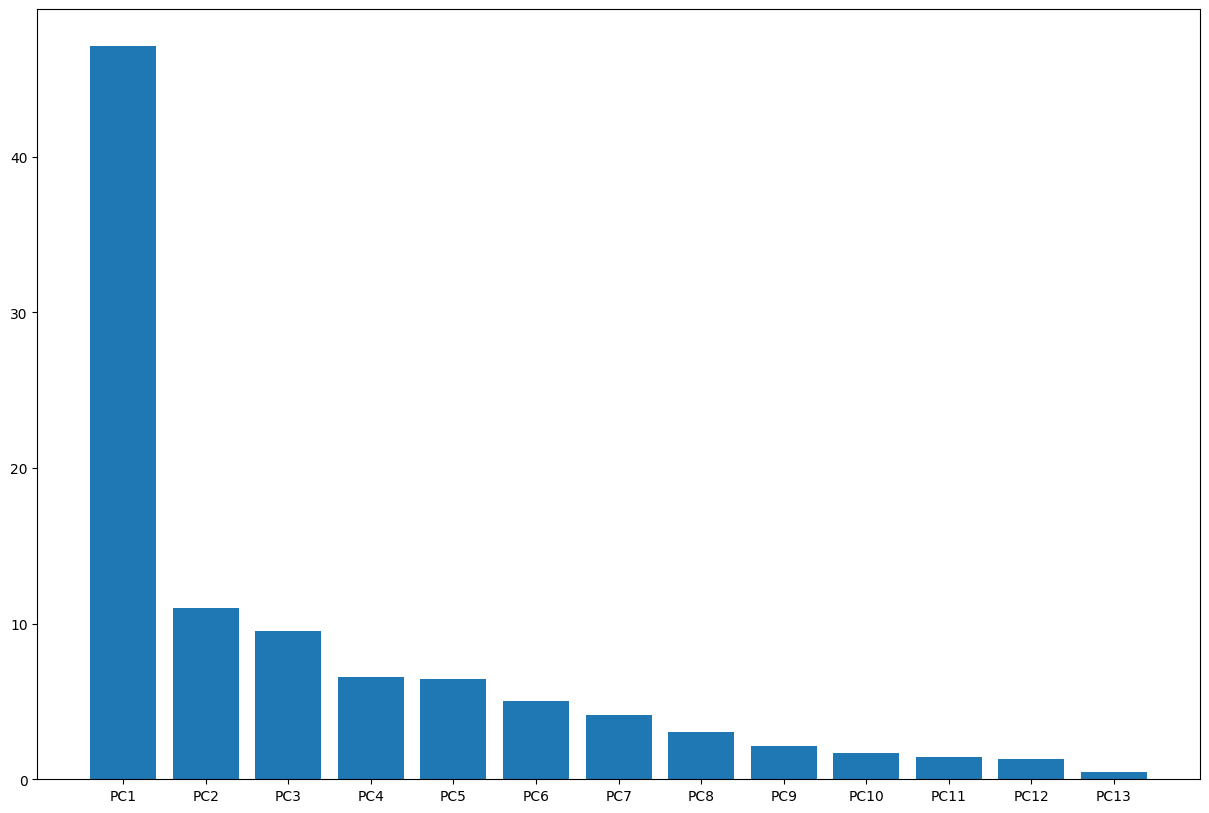

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'], pca.explained_variance_ratio_ * 100)

Reduksi Feature

In [10]:
pca = PCA(n_components=5)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
X_std_pca['MEDV'] = y
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,MEDV
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,24.0
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,21.6
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,34.7
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,33.4
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,36.2


Sampling Dataset

In [11]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and labels, respectively
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
X_pca = X_std_pca.drop('MEDV', axis=1)
y_pca = X_std_pca['MEDV']

X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(X_pca,y_pca,
                                                test_size = 0.4,
                                                random_state = 42)
X_train_pca.shape

(303, 5)

In [22]:
X_train, X_test,Y_train,Y_test = train_test_split(X_std,y,
                                                test_size = 0.4,
                                                random_state = 42)
X_train.shape

(303, 13)

## Regression Model (20 point)

bebas menggunakan model apapun

Modelling with PCA

In [14]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model_pca = LinearRegression()

# Melatih model regresi linear menggunakan data
model_pca.fit(X_train_pca, Y_train_pca)


LinearRegression()

Modelling without PCA

In [17]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Predicting

In [15]:
y_pred_pca = model_pca.predict(X_test_pca)

In [18]:
y_pred = model.predict(X_test)

## Evaluasi (20)

Bandingkan hasil menggunakan PCA dan tidak menggunakan PCA

Evaluation with PCA

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming Y_test_pca and y_pred are your true labels and predicted labels, respectively
mae = mean_absolute_error(Y_test_pca, y_pred_pca)
mse = mean_squared_error(Y_test_pca, y_pred_pca)
r2 = r2_score(Y_test_pca, y_pred_pca)

print("Mean Absolute Error PCA:", mae)
print("Mean Squared Error PCA:", mse)
print("R-squared Score PCA:", r2)


Mean Absolute Error PCA: 3.315535208771312
Mean Squared Error PCA: 24.681303178634973
R-squared Score PCA: 0.6750047603547225


Evaluation without PCA

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming Y_test and y_pred are your true labels and predicted labels, respectively
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Absolute Error: 3.2979696834924135
Mean Squared Error: 21.83270998957742
R-squared Score: 0.7125140936111225


Coba dengan metode lain ya

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housing.csv')

# Feature selection
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = data[features]
y = data['MEDV']

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Applying PCA
pca = PCA().fit(X_std)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # Number of components to explain 95% variance

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)

# Splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.4, random_state=42)

# Model
model = GradientBoostingRegressor()

# Hyperparameter tuning (example)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Optimal PCA Components: {n_components}")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Optimal PCA Components: 9
Mean Absolute Error: 2.5328129530270975
Mean Squared Error: 15.021695190206653
R-squared Score: 0.8021992844994692


Evaluation without PCA

Mean Absolute Error: 3.2979696834924135
Mean Squared Error: 21.83270998957742
R-squared Score: 0.7125140936111225

Evaluation with PCA

Mean Absolute Error: 2.5328129530270975
Mean Squared Error: 15.021695190206653
R-squared Score: 0.8021992844994692

**di kasus ini kebetulan kalo pake PCA accuracy nya justru naik, karena jumlah fitur awalnya lumayan banyak.
tapi ketika jumlah fiturnya cukup banyak, dan ada noise, biasanya pake PCA akan membantu meningkatkan akurasi.
setidaknya kita sudah belajar bagaimana cara mengaplikasikan PCA dalam modelling**